In [1]:
import pandas as pd
from datetime import datetime
import xarray as xr

In [2]:
df = pd.read_csv('./data/EC_day.csv', sep='\t', index_col=['date'],
        parse_dates=['date'])
df

,BCAA_T,FREI_T,KOREA_T
date,,,
1999-02-23,4.0000,2.875,3.975
1999-02-24,3.3125,2.575,3.800
1999-02-25,3.2000,2.175,3.700
1999-03-18,3.8750,2.575,3.400
1999-03-19,2.9750,2.200,3.750
...,...,...,...
2005-02-11,3.2500,3.250,3.050
2005-02-12,3.0750,3.200,2.500
2005-08-08,-0.6125,-0.725,-0.950


In [3]:
df.resample('1YE').mean().dropna()

,BCAA_T,FREI_T,KOREA_T
date,,,
1999-12-31,1.701524,1.046951,2.101829
2003-12-31,0.202813,-0.138750,0.399375
2004-12-31,1.145109,0.546739,1.531522
2005-12-31,1.623214,1.446429,1.478571


In [4]:
filenames = ['/home/cr2/cmtorres/ARs_DATA/vSHT/vSHT_1999.nc',
            '/home/cr2/cmtorres/ARs_DATA/vSHT/vSHT_2003.nc',
            '/home/cr2/cmtorres/ARs_DATA/vSHT/vSHT_2004.nc',
            '/home/cr2/cmtorres/ARs_DATA/vSHT/vSHT_2005.nc',]

ds1 = xr.open_dataset(filenames[0])#.sel(lon=slice(297, 303), lat=slice(-58,-62))
ds2 = xr.open_dataset(filenames[1])#.sel(lon=slice(297, 303), lat=slice(-58,-62))
ds3 = xr.open_dataset(filenames[2])#.sel(lon=slice(297, 303), lat=slice(-58,-62))
ds4 = xr.open_dataset(filenames[3])#.sel(lon=slice(297, 303), lat=slice(-58,-62))


In [5]:
ds = xr.merge([ds1, ds2, ds3, ds4])

In [6]:
ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
ds = ds.sortby(ds.lon)
ds_com = ds.copy()
ds = ds.sel(lon=slice(-68, -48), lat=slice(-58,-65))


In [7]:
ds_SSI = ds.sel(time=df.index.values)
ds_SSI

<xarray.Dataset> Size: 547kB
Dimensions:          (time: 111, lat: 15, lon: 41)
Coordinates:
  * time             (time) datetime64[ns] 888B 1999-02-23 ... 2005-08-10
  * lat              (lat) float32 60B -58.0 -58.5 -59.0 ... -64.0 -64.5 -65.0
  * lon              (lon) float32 164B -68.0 -67.5 -67.0 ... -49.0 -48.5 -48.0
Data variables:
    enar_binary_tag  (time, lat, lon) float64 546kB 1.0 1.0 1.0 ... 0.0 0.0 0.0
Attributes:
    description:  Binary indicator of energy atmospheric river using vSHT ERA-5
    credits:      Developed by V. Buffet, B. Pohl and V. Favier from Wille et...

In [8]:
AR_SSI_df = ds_SSI.max(('lat','lon')).to_dataframe()

In [9]:
AR_SSI_df.sum()

enar_binary_tag    10.0
dtype: float64

In [10]:
AR_SSI_df

,enar_binary_tag
time,
1999-02-23,1.0
1999-02-24,0.0
1999-02-25,0.0
1999-03-18,0.0
1999-03-19,1.0
...,...
2005-02-11,1.0
2005-02-12,0.0
2005-08-08,0.0


In [11]:
AR_days = AR_SSI_df.where(AR_SSI_df['enar_binary_tag']==1).dropna()
AR_days

,enar_binary_tag
time,
1999-02-23,1.0
1999-03-19,1.0
1999-05-01,1.0
1999-07-09,1.0
1999-09-22,1.0
1999-11-14,1.0
2004-06-03,1.0
2004-07-20,1.0
2004-11-18,1.0


In [12]:
AR_days.index[1]

Timestamp('1999-03-19 00:00:00')

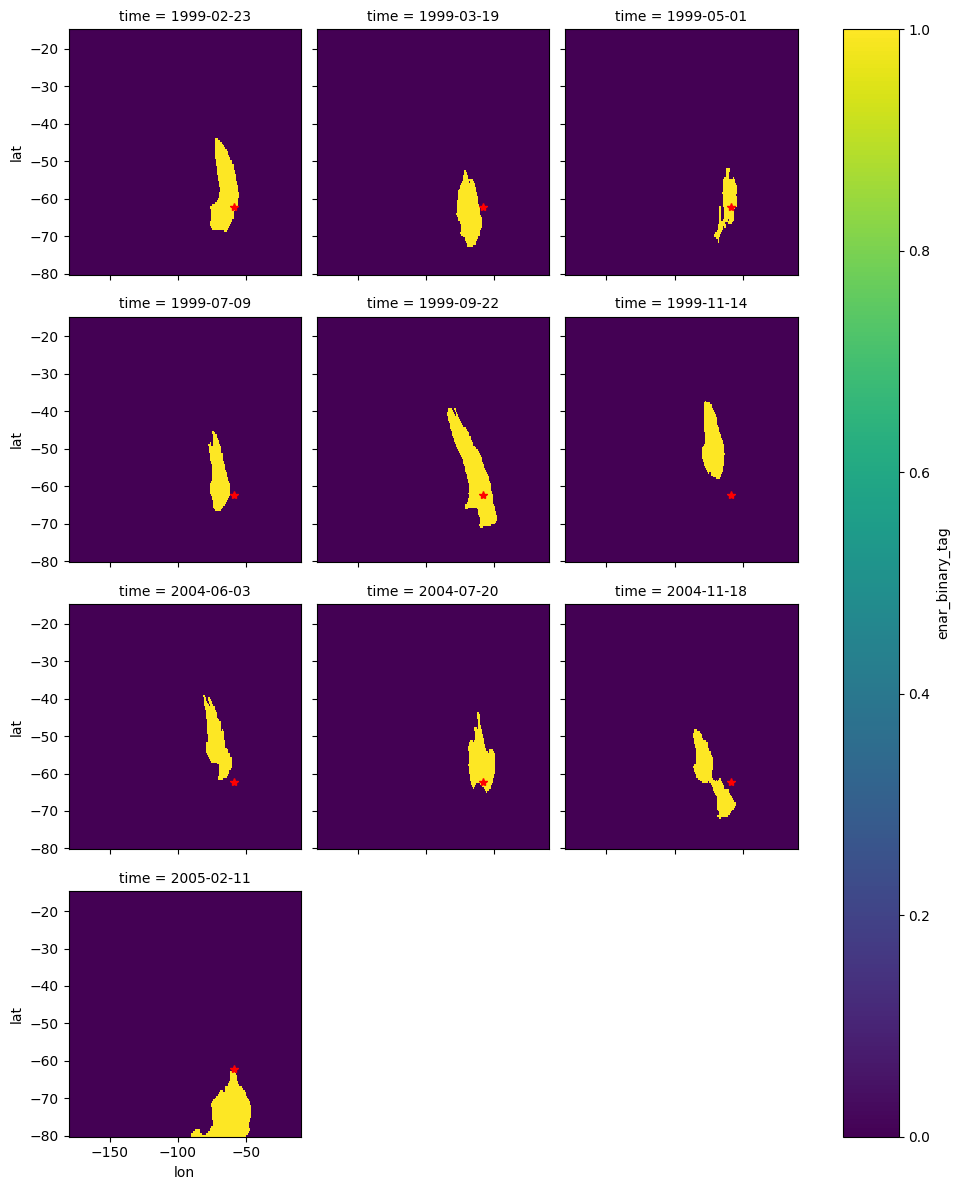

In [14]:
g = ds_com.sel(time=AR_days.index).enar_binary_tag.plot.imshow(x="lon", y="lat", col="time", col_wrap=3, robust=True)
for i, ax in enumerate(g.axs.flat):
    ax.plot(-58.613468, -62.235946, 'r*')
